In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# %% [code]
# 데이터 경로 설정
scene_folder = "/home/knuvi/Desktop/song/Pointcept/data/fusion_pd00005_scale05/train/scene0010_00"  # scene 폴더 경로
feature_path = os.path.join(scene_folder, "features.npy")

# feature.npy 파일 로드
if not os.path.exists(feature_path):
    raise FileNotFoundError(f"{feature_path} 파일이 존재하지 않습니다. 경로를 확인해주세요.")
features = np.load(feature_path)

# 데이터 차원 확인
print("Feature shape:", features.shape)

# 속성 분리 (가정: scale=[0:3], opacity=[3:4], rotation=[4:7])
scale = features[:, 0:3]  # [N, 3]
opacity = features[:, 3:4]  # [N, 1]
rotation = features[:, 4:7]  # [N, 3]

print("Scale shape:", scale.shape)
print("Opacity shape:", opacity.shape)
print("Rotation shape:", rotation.shape)

Feature shape: (189231, 7)
Scale shape: (189231, 3)
Opacity shape: (189231, 1)
Rotation shape: (189231, 3)



Scale 통계:
최소값: 0.0512
최대값: 0.1698
평균: 0.0858
표준편차: 0.0162
NaN 값 개수: 0
Inf 값 개수: 0


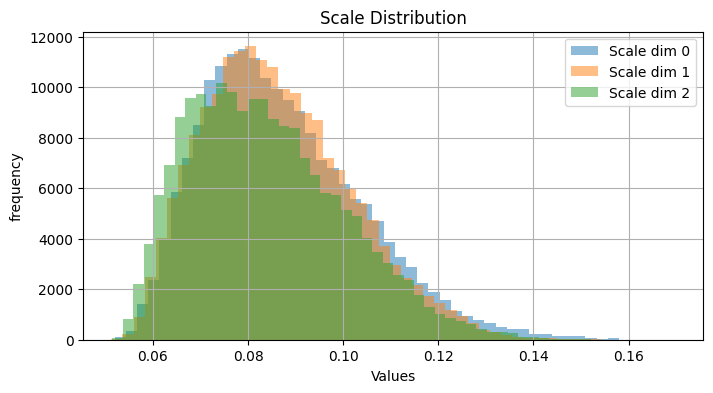


Opacity 통계:
최소값: 0.0078
최대값: 0.9626
평균: 0.2408
표준편차: 0.1362
NaN 값 개수: 0
Inf 값 개수: 0


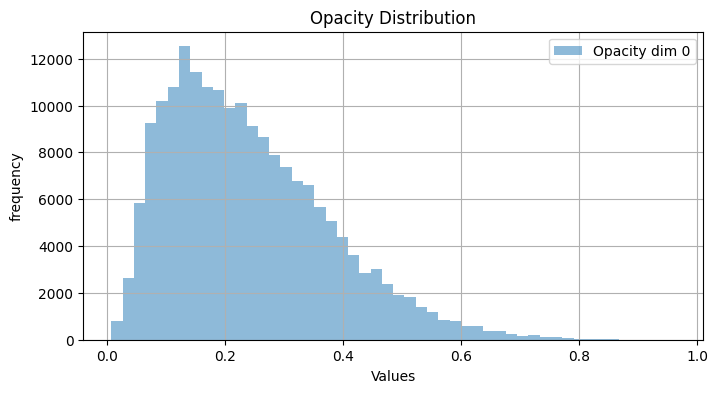


Rotation 통계:
최소값: -0.5929
최대값: 0.9939
평균: 0.5672
표준편차: 0.1079
NaN 값 개수: 0
Inf 값 개수: 0


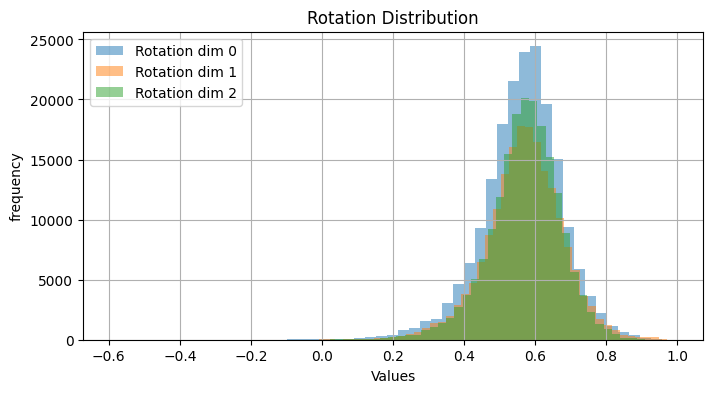

In [4]:
# %% [code]
# 통계 정보 출력 함수
def print_stats(data, name):
    print(f"\n{name} 통계:")
    print(f"최소값: {np.min(data):.4f}")
    print(f"최대값: {np.max(data):.4f}")
    print(f"평균: {np.mean(data):.4f}")
    print(f"표준편차: {np.std(data):.4f}")
    print(f"NaN 값 개수: {np.isnan(data).sum()}")
    print(f"Inf 값 개수: {np.isinf(data).sum()}")

# 히스토그램 시각화 함수
def plot_histogram(data, name, bins=50):
    plt.figure(figsize=(8, 4))
    if data.ndim == 2:
        # 다차원 데이터의 경우 각 차원별로 히스토그램을 그림
        for i in range(data.shape[1]):
            plt.hist(data[:, i], bins=bins, alpha=0.5, label=f"{name} dim {i}")
    else:
        plt.hist(data, bins=bins, alpha=0.5, label=name)
    plt.title(f"{name} Distribution")
    plt.xlabel("Values")
    plt.ylabel("frequency")
    plt.legend()
    plt.grid(True)
    plt.show()

# Scale 분석
print_stats(scale, "Scale")
plot_histogram(scale, "Scale")

# Opacity 분석
print_stats(opacity, "Opacity")
plot_histogram(opacity, "Opacity")

# Rotation 분석
print_stats(rotation, "Rotation")
plot_histogram(rotation, "Rotation")


Scale 통계 (전체 Scene):
최소값: [0. 0. 0.]
최대값: [0.61216706 0.59367627 0.55738634]
평균: [0.05453228 0.05387882 0.05576023]
표준편차: [0.04086499 0.04034564 0.04284628]
NaN 값 개수: 0
Inf 값 개수: 0


/home/knuvi/miniconda3/envs/pt/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/knuvi/miniconda3/envs/pt/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


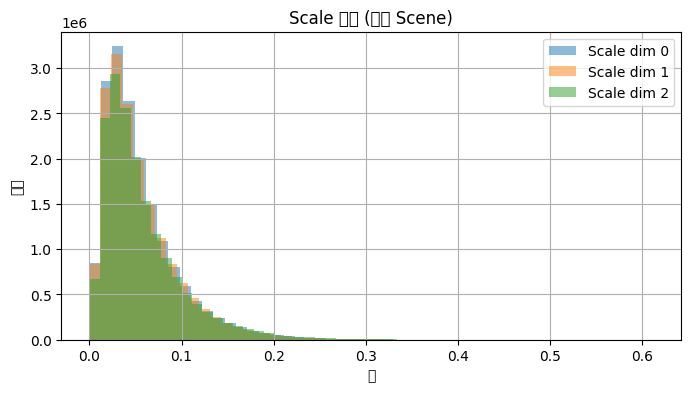


Opacity 통계 (전체 Scene):
최소값: [0.00212135]
최대값: [0.9989025]
평균: [0.29858452]
표준편차: [0.15317285]
NaN 값 개수: 0
Inf 값 개수: 0


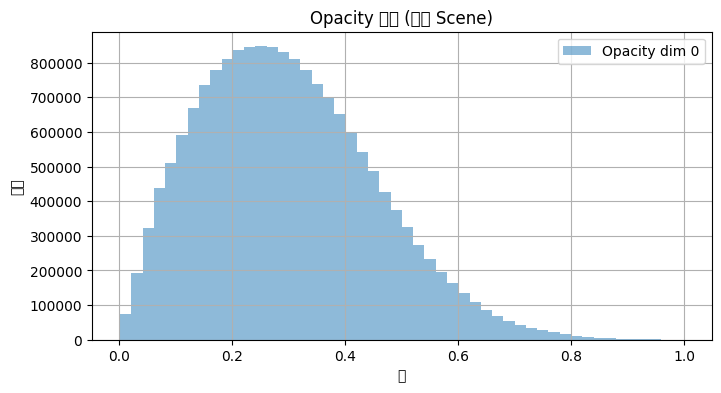


Rotation 통계 (전체 Scene):
최소값: [-0.99977374 -0.9959331  -0.9982023 ]
최대값: [0.9999942  0.99999017 0.9999909 ]
평균: [0.55149615 0.5534675  0.5575254 ]
표준편차: [0.14489204 0.14511485 0.13034816]
NaN 값 개수: 0
Inf 값 개수: 0


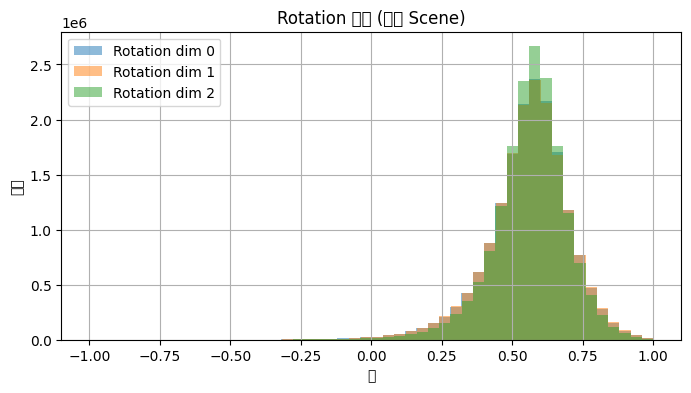

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

# 전체 Scene 경로 설정
data_root = "/home/knuvi/Desktop/song/Pointcept/data/fusion_pd00005_vox004_all/train"
scene_folders = [f for f in os.listdir(data_root) if os.path.isdir(os.path.join(data_root, f))]

# 속성별 리스트 초기화
all_scales = []
all_opacities = []
all_rotations = []

# 각 Scene의 속성 수집
for scene_folder in scene_folders:
    feature_path = os.path.join(data_root, scene_folder, "features.npy")
    if not os.path.exists(feature_path):
        print(f"Skipping {scene_folder}: features.npy not found.")
        continue
    
    # features.npy 로드
    features = np.load(feature_path)
    
    # 속성 분리
    scale = features[:, 0:3]  # [N, 3]
    opacity = features[:, 3:4]  # [N, 1]
    rotation = features[:, 4:7]  # [N, 3]
    
    all_scales.append(scale)
    all_opacities.append(opacity)
    all_rotations.append(rotation)

# 속성 병합
all_scales = np.concatenate(all_scales, axis=0)  # [Total_N, 3]
all_opacities = np.concatenate(all_opacities, axis=0)  # [Total_N, 1]
all_rotations = np.concatenate(all_rotations, axis=0)  # [Total_N, 3]

# 통계 정보 출력 함수
def print_stats(data, name):
    print(f"\n{name} 통계 (전체 Scene):")
    print(f"최소값: {np.min(data, axis=0)}")
    print(f"최대값: {np.max(data, axis=0)}")
    print(f"평균: {np.mean(data, axis=0)}")
    print(f"표준편차: {np.std(data, axis=0)}")
    print(f"NaN 값 개수: {np.isnan(data).sum()}")
    print(f"Inf 값 개수: {np.isinf(data).sum()}")

# 히스토그램 시각화 함수
def plot_histogram(data, name, bins=50):
    plt.figure(figsize=(8, 4))
    if data.ndim == 2:
        for i in range(data.shape[1]):
            plt.hist(data[:, i], bins=bins, alpha=0.5, label=f"{name} dim {i}")
    else:
        plt.hist(data, bins=bins, alpha=0.5, label=name)
    plt.title(f"{name} 분포 (전체 Scene)")
    plt.xlabel("값")
    plt.ylabel("빈도")
    plt.legend()
    plt.grid(True)
    plt.show()

# 통계 출력 및 시각화
print_stats(all_scales, "Scale")
plot_histogram(all_scales, "Scale")

print_stats(all_opacities, "Opacity")
plot_histogram(all_opacities, "Opacity")

print_stats(all_rotations, "Rotation")
plot_histogram(all_rotations, "Rotation")


Scale (Processed) 통계:
최소값: 0.0000
최대값: 1.0000
평균: 0.7304
표준편차: 0.3858
NaN 값 개수: 0
Inf 값 개수: 0


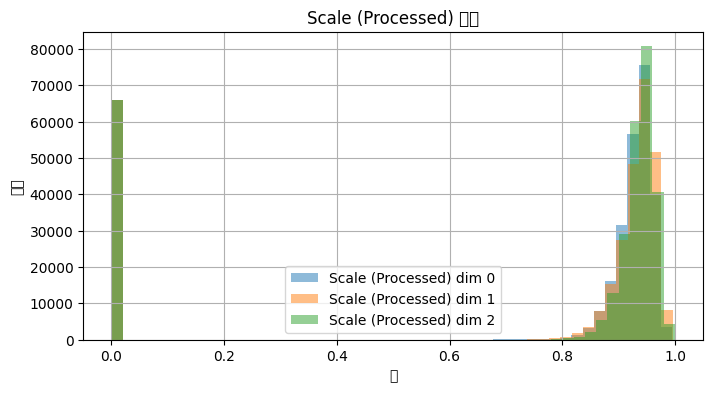


Opacity (Processed) 통계:
최소값: 0.0000
최대값: 0.9400
평균: 0.1460
표준편차: 0.1556
NaN 값 개수: 0
Inf 값 개수: 0


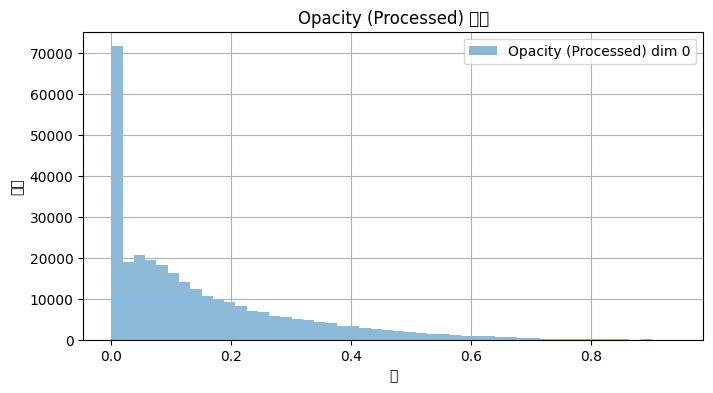


Rotation (Processed) 통계:
최소값: -0.9892
최대값: 1.0000
평균: 0.1314
표준편차: 0.5622
NaN 값 개수: 0
Inf 값 개수: 0


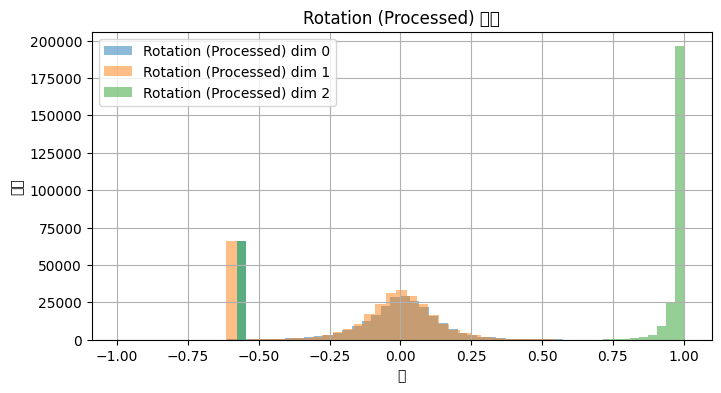

In [5]:
# %% [code]
# Scale 전처리 후 분석
print_stats(scale_processed, "Scale (Processed)")
plot_histogram(scale_processed, "Scale (Processed)")

# Opacity 전처리 후 분석
print_stats(opacity_processed, "Opacity (Processed)")
plot_histogram(opacity_processed, "Opacity (Processed)")

# Rotation 전처리 후 분석
print_stats(rotation_processed, "Rotation (Processed)")
plot_histogram(rotation_processed, "Rotation (Processed)")